## 0. Monte-Carlo method

(a)

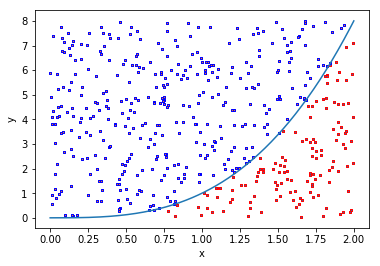

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x**3

N = 500
x = np.arange(0,2.005,0.005)#the range of the x-axis
y = x**3
xmin = 0
xmax = 2
ymin = 0
ymax = f(xmax)

xdata = np.random.uniform(xmin, xmax, N)# create random data point 
ydata = np.random.uniform(ymin, ymax, N)
eye = ydata <= f(xdata)

#Plot the distribution in the box
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(xdata[eye], ydata[eye], marker = ",", edgecolor = "r", s = 2)
plt.scatter(xdata[~eye], ydata[~eye], marker = ",", edgecolor = "b", s = 2)
plt.axis("on")
plt.show()



(b)

To get the area under the curve $y = x^3 $ with $x \in [0,2]$ 

 Area =  $\int_{0}^{2} y\text{ d}x$ =  $\int_{0}^{2} x^3\text{ d}x$
 $ =\frac{x^{4}}{4} =  \frac{x^{4}}{4}\,\Big|_0^2 = 4$

In [6]:
#the area of the box that encloses the curve
rect_area = (xmax - xmin) * (ymax - ymin)

#counts the number of points under the curve in the box
counter = 0
for i in range(N):
    if ydata[i] <= f(xdata[i]):
        counter += 1

# the ratio of the number of points under the curve over the total number of points to get the numerical integration
fnArea = rect_area * float(counter) / N
print ("Numerical integration = ", fnArea)
#the absolute error of the numerical integration is given by error 
error = abs(4 - (counter / N) * rect_area)
print("Error = ", error)


Numerical integration =  4.128
Error =  0.1280000000000001


(c)

From the table below the average error decreases and the number of points increases. Since the data points are fitted randomly some its happens that smaller data point generates a bigger error

In [7]:
import pandas as pd
# Computes the area of the box
x = np.arange(0,2.005,0.005)
y = x**3
xmin = 0
xmax = 2
ymin = 0
ymax = f(xmax)

#xdata = np.random.uniform(xmin, xmax, N)
#ydata = np.random.uniform(ymin, ymax, N)
eye = ydata <= f(xdata)
rect_area = (xmax - xmin) * (ymax - ymin)

#variable that counts the number of points under the curve in the box
l = []
counter = 0
for j in np.arange(500,2001,100):
    xdata = np.random.uniform(xmin, xmax, j)
    ydata = np.random.uniform(ymin, ymax, j)
    counter = 0
    for i in range(j):
        if ydata[i] <= f(xdata[i]):
            counter += 1
    fnArea = rect_area * float(counter) / j
    error = abs(4 - (counter / j) * rect_area)
    l.append([j,fnArea,error])

# inference
#print("Error min = ",min(df.Error),"Error max =",df.Error.max())
l=np.array(l)
ind=[int(l[i, 0]) for i in range(len(l))]
df = pd.DataFrame(l[:, 1:3],columns = ['Numerical_Integration', 'Error'], index=ind)
print("Error min = ",min(df.Error),"Error max =",df.Error.max())
df

Error min =  0.01 Error max = 0.4


Numerical_Integration     Error
500                3.744000  0.256000
600                3.600000  0.400000
700                4.137143  0.137143
800                4.340000  0.340000
900                4.177778  0.177778
1000               4.080000  0.080000
1100               4.349091  0.349091
1200               4.013333  0.013333
1300               4.073846  0.073846
1400               3.920000  0.080000
1500               4.085333  0.085333
1600               3.990000  0.010000
1700               3.981176  0.018824
1800               3.902222  0.097778
1900               4.261053  0.261053
2000               4.056000  0.056000

## 1. Classes

(a)
-Initialize the class.

give the name of the class, e,g floats_sensors and the initial sum and the number of elements must be set to zero

Input floats, record them and the sum of the number one by one. 

Output float, If the  number of floats is 1000 and  return the sum of the 1000 floats.

I will use count and sum to count the elements and and the sum of $n$ elements to avoid storing a list of length 1000


(b)

In [4]:
class Sensor_float:
    def __init__(self):
        self.count = 0
        self.sum_of_elements = 0
        self.y = 0
    # les deux methodes Input et Output      
    def Input_floats(self, d):
        self.count +=1  
        self.sum_of_elements += d
        if self.count == 1000:
            self.y = self.sum_of_elements
   
    def Output_floats(self):
        if self.count >= 1000:
            return self.y

(c)

In [6]:
import numpy as np
ss= Sensor_float()
for i in range(9000):
    l = 2*np.random.rand()
    ss.Input_floats(l)
ss.Output_floats()

1008.6991662012582